In [218]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(15, 8))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)


In [219]:
df = pd.read_csv('./data/train_data.csv')

#### Kiểm tra đồ thị ACF và PACF phần dư của mô hình ARIMA(0,1,0) tức d=1 , p=q=0
Như chúng ta đã đã có sai phân bậc một (difference level 1)  giá đóng cửa điều chỉnh của của Bitcoin cho nên nó chính là phần dư của mô hình ARIMA(0,1,0)

Text(0.5, 0.98, 'Biểu đồ  ACF và PACF của phần dư ARIMA(0,1,0)')

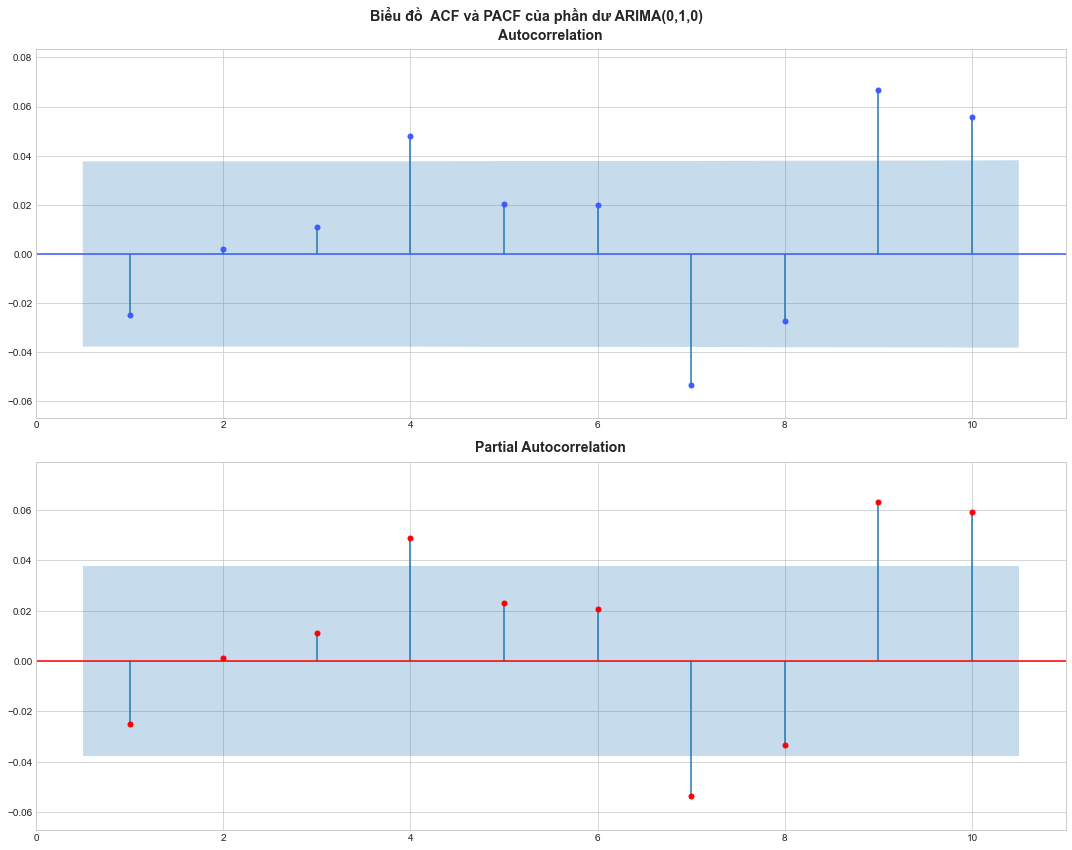

In [220]:
fig, ax = plt.subplots(2,1,figsize=(15, 12))
chart = plot_acf(df['price_diff_1'],lags=range(1,11),ax=ax[0],auto_ylims=True,color='#3d5afe',markerfacecoloralt='green')
chart = plot_pacf(df['price_diff_1'],lags=range(1,11),ax=ax[1],auto_ylims=True,color='red')
plt.suptitle("Biểu đồ  ACF và PACF của phần dư ARIMA(0,1,0)", fontsize="x-large",fontweight="bold")